# Adicionar requimentos.txt

In [1]:
#https://towardsdatascience.com/generating-a-requirements-file-jupyter-notebook-385f1c315b52
#instalar pacotes
#pip install pipreqs
#pip install nbconvert

#Then, navigate to the folder where your Jupyter notebook is located.
#jupyter nbconvert --output-dir="./reqs" --to script NOMECODIGO.ipynb
# cd reqs
# pipreqs --encoding=utf8

#Virtualenv
#https://www.geeksforgeeks.org/using-jupyter-notebook-in-virtual-environment/

# Python version

In [2]:
from platform import python_version
print(python_version())

3.9.7


# Bibliotecas

In [3]:
import numpy as np
import scipy
import scipy.spatial
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white", palette="pastel")

#Escolha do número de clusters
from yellowbrick.cluster import KElbowVisualizer

#Data Analysis
from pivottablejs import pivot_ui

In [4]:
df = pd.read_csv("OPM_SP.csv", sep=';', index_col=0)
df.head(5)

,Qnt_2008,Qnt_2009,Qnt_2010,Qnt_2011,Qnt_2012,Qnt_2013,Qnt_2014,Qnt_2015,Qnt_2016,Qnt_2017,Qnt_2018,Qnt_2019,Qnt_2020,Qnt_2021,Qnt_2022
Unidade da Federação,,,,,,,,,,,,,,,
11 Rondônia,4400,5532,5144,6449,7100,6270,9441,9943,11041,12093,13256,16900,12173,15463,15521
12 Acre,1934,2378,2085,2116,2000,1905,3191,2314,1645,1485,1582,1261,898,649,586
13 Amazonas,397,102,308,597,3979,36,593,760,1007,1006,328,550,725,703,627
14 Roraima,0,0,0,0,190,624,105,0,60,429,139,926,172,176,1768
15 Pará,707,1227,837,1226,1292,1599,1903,1340,1687,1526,2044,2704,3916,4471,5739


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 11 Rondônia to 53 Distrito Federal
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Qnt_2008  27 non-null     int64
 1   Qnt_2009  27 non-null     int64
 2   Qnt_2010  27 non-null     int64
 3   Qnt_2011  27 non-null     int64
 4   Qnt_2012  27 non-null     int64
 5   Qnt_2013  27 non-null     int64
 6   Qnt_2014  27 non-null     int64
 7   Qnt_2015  27 non-null     int64
 8   Qnt_2016  27 non-null     int64
 9   Qnt_2017  27 non-null     int64
 10  Qnt_2018  27 non-null     int64
 11  Qnt_2019  27 non-null     int64
 12  Qnt_2020  27 non-null     int64
 13  Qnt_2021  27 non-null     int64
 14  Qnt_2022  27 non-null     int64
dtypes: int64(15)
memory usage: 3.4+ KB


# Exploração dados

In [6]:
df.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Qnt_2008,27.0,6077.000000,7332.203237,0.0,687.5,2582.0,9730.5,25308.0
Qnt_2009,27.0,5852.592593,6907.706178,0.0,991.5,2378.0,8904.5,24904.0
Qnt_2010,27.0,6627.185185,8014.031507,0.0,1173.5,2975.0,10403.0,31771.0
Qnt_2011,27.0,7322.185185,9082.388787,0.0,1295.0,2831.0,11600.0,36889.0
Qnt_2012,27.0,8119.185185,9339.707070,0.0,1646.0,3268.0,13831.0,37749.0


<AxesSubplot:>

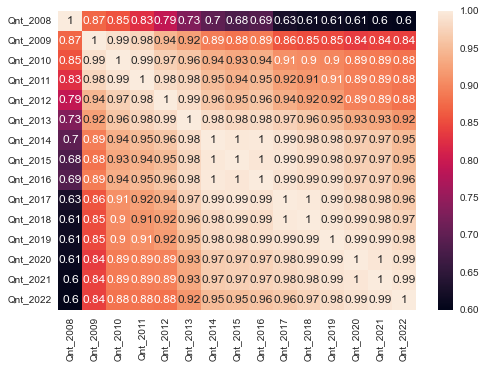

In [7]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

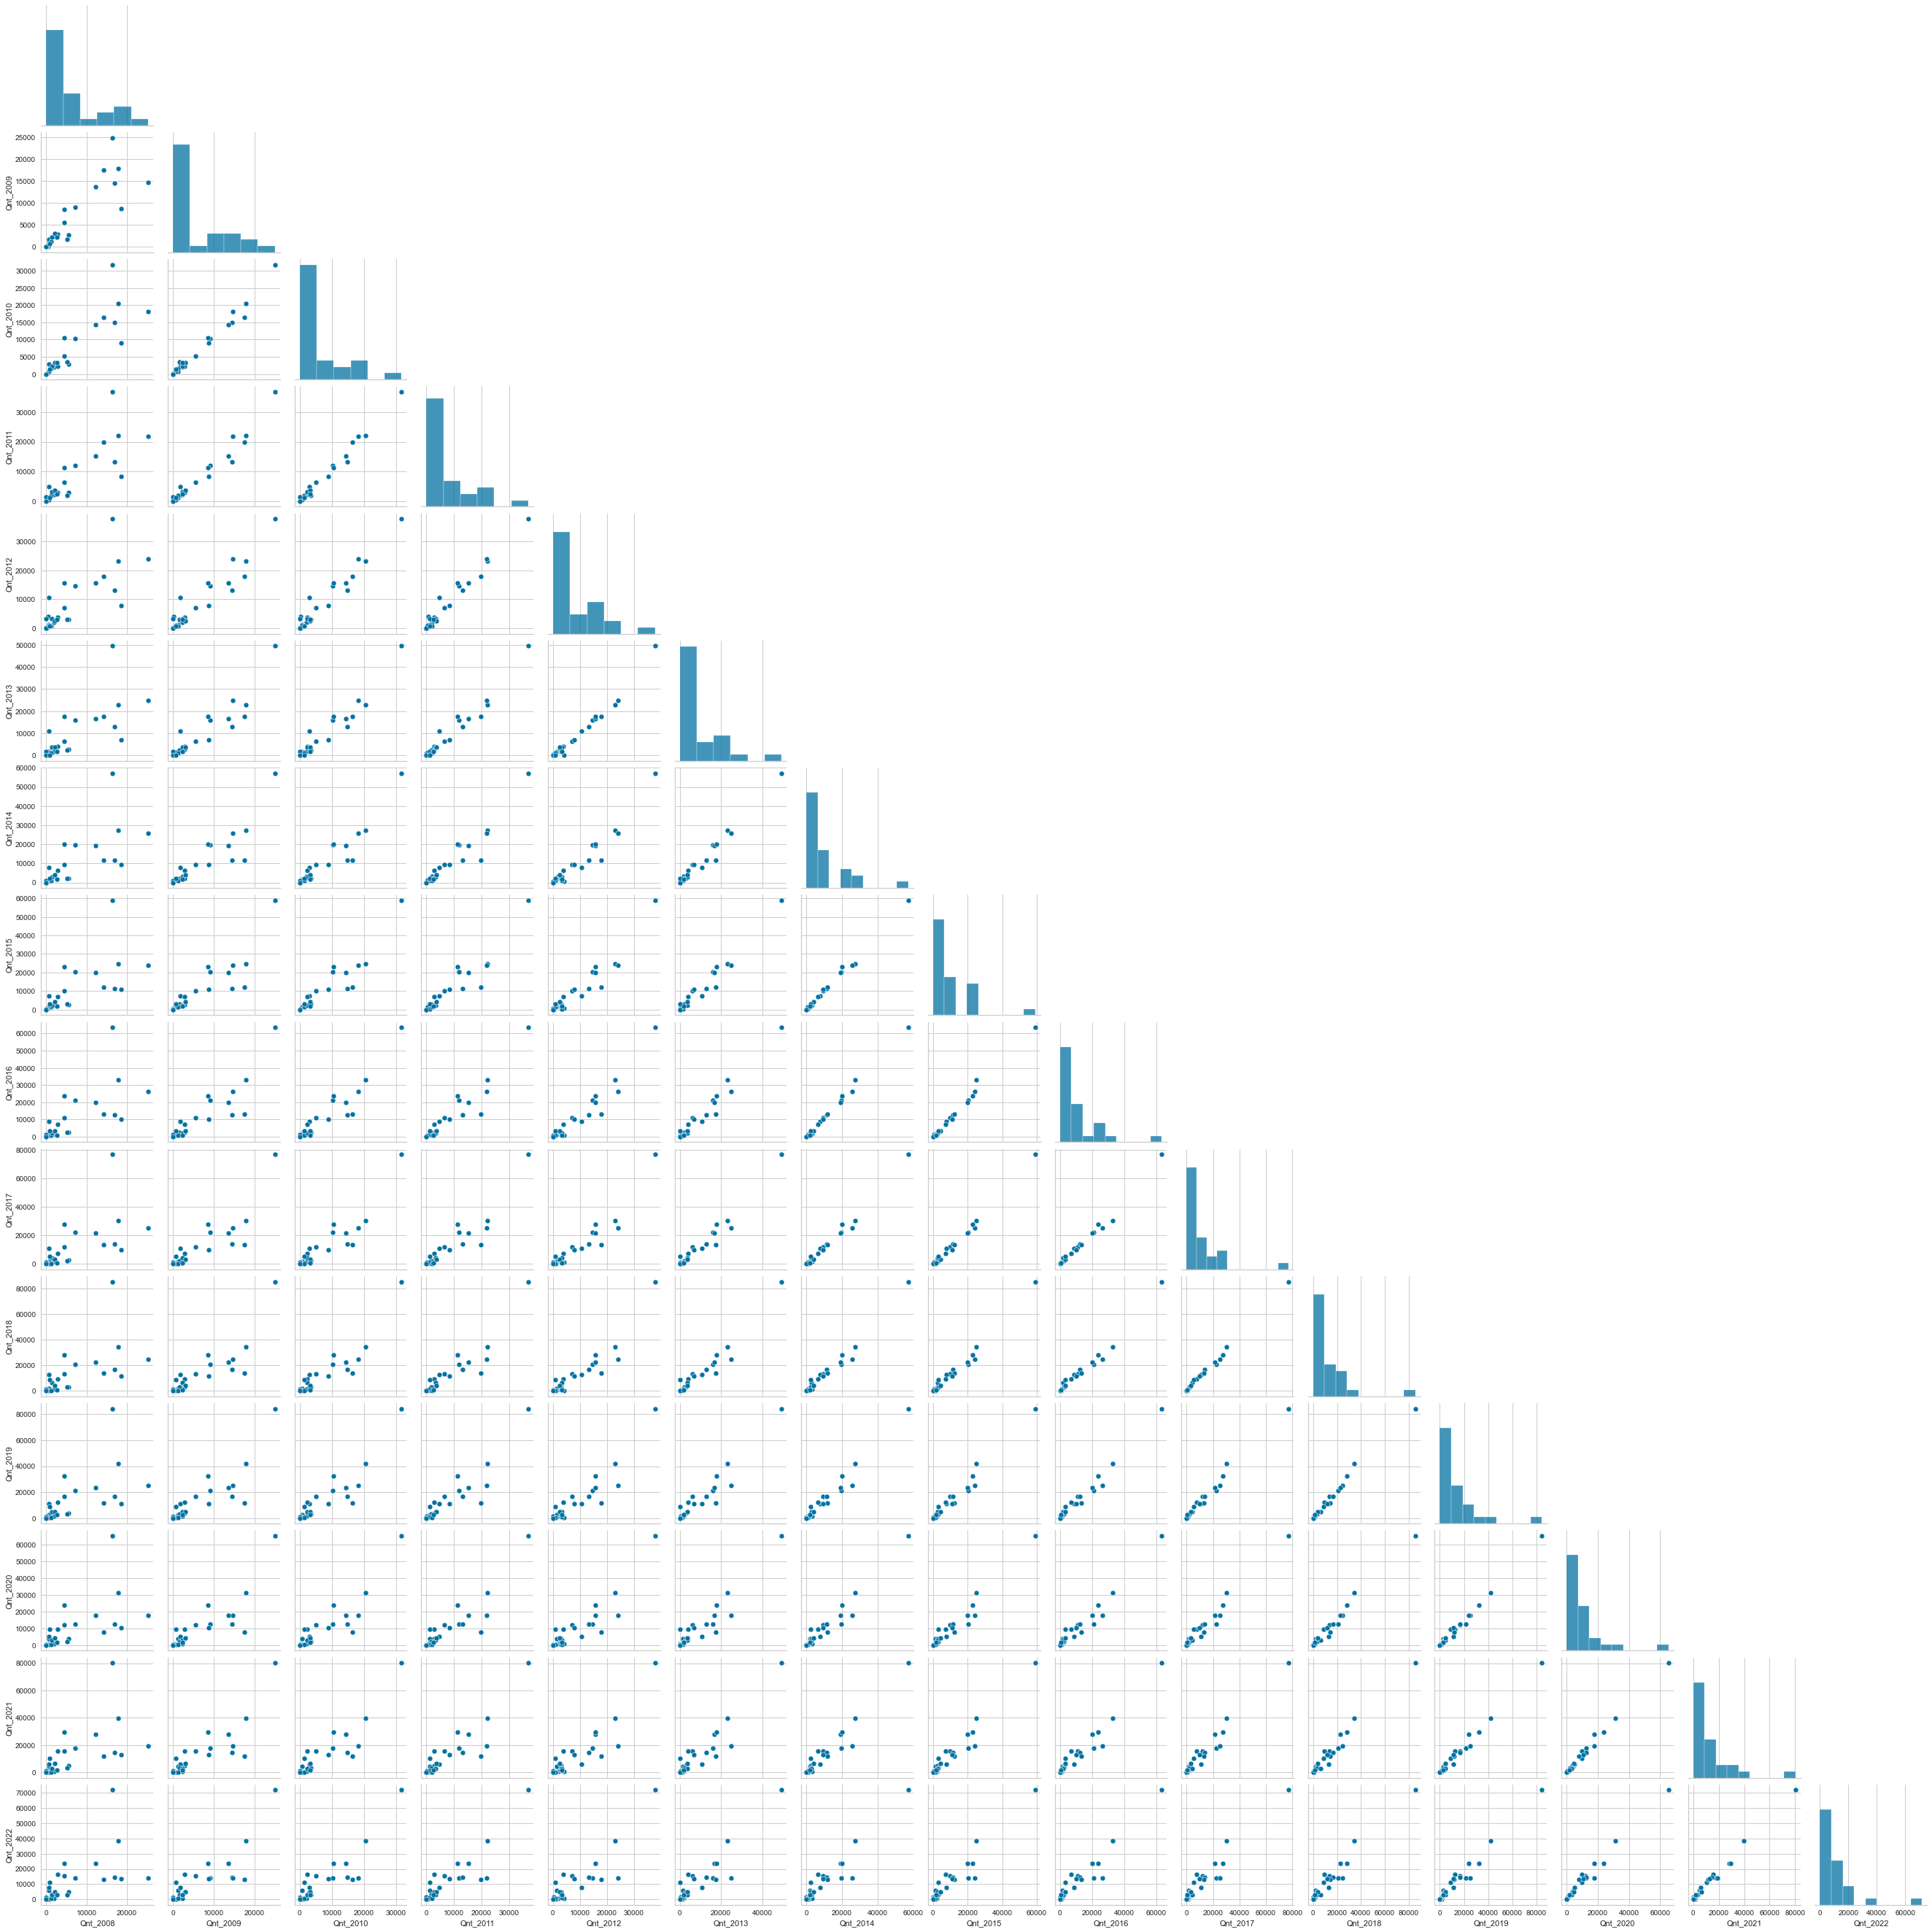

In [8]:
sns.pairplot(df,corner=True)
# na distribuicao normal os pontos estao distribuidos ao longo da reta de 45 graus

# Transformação

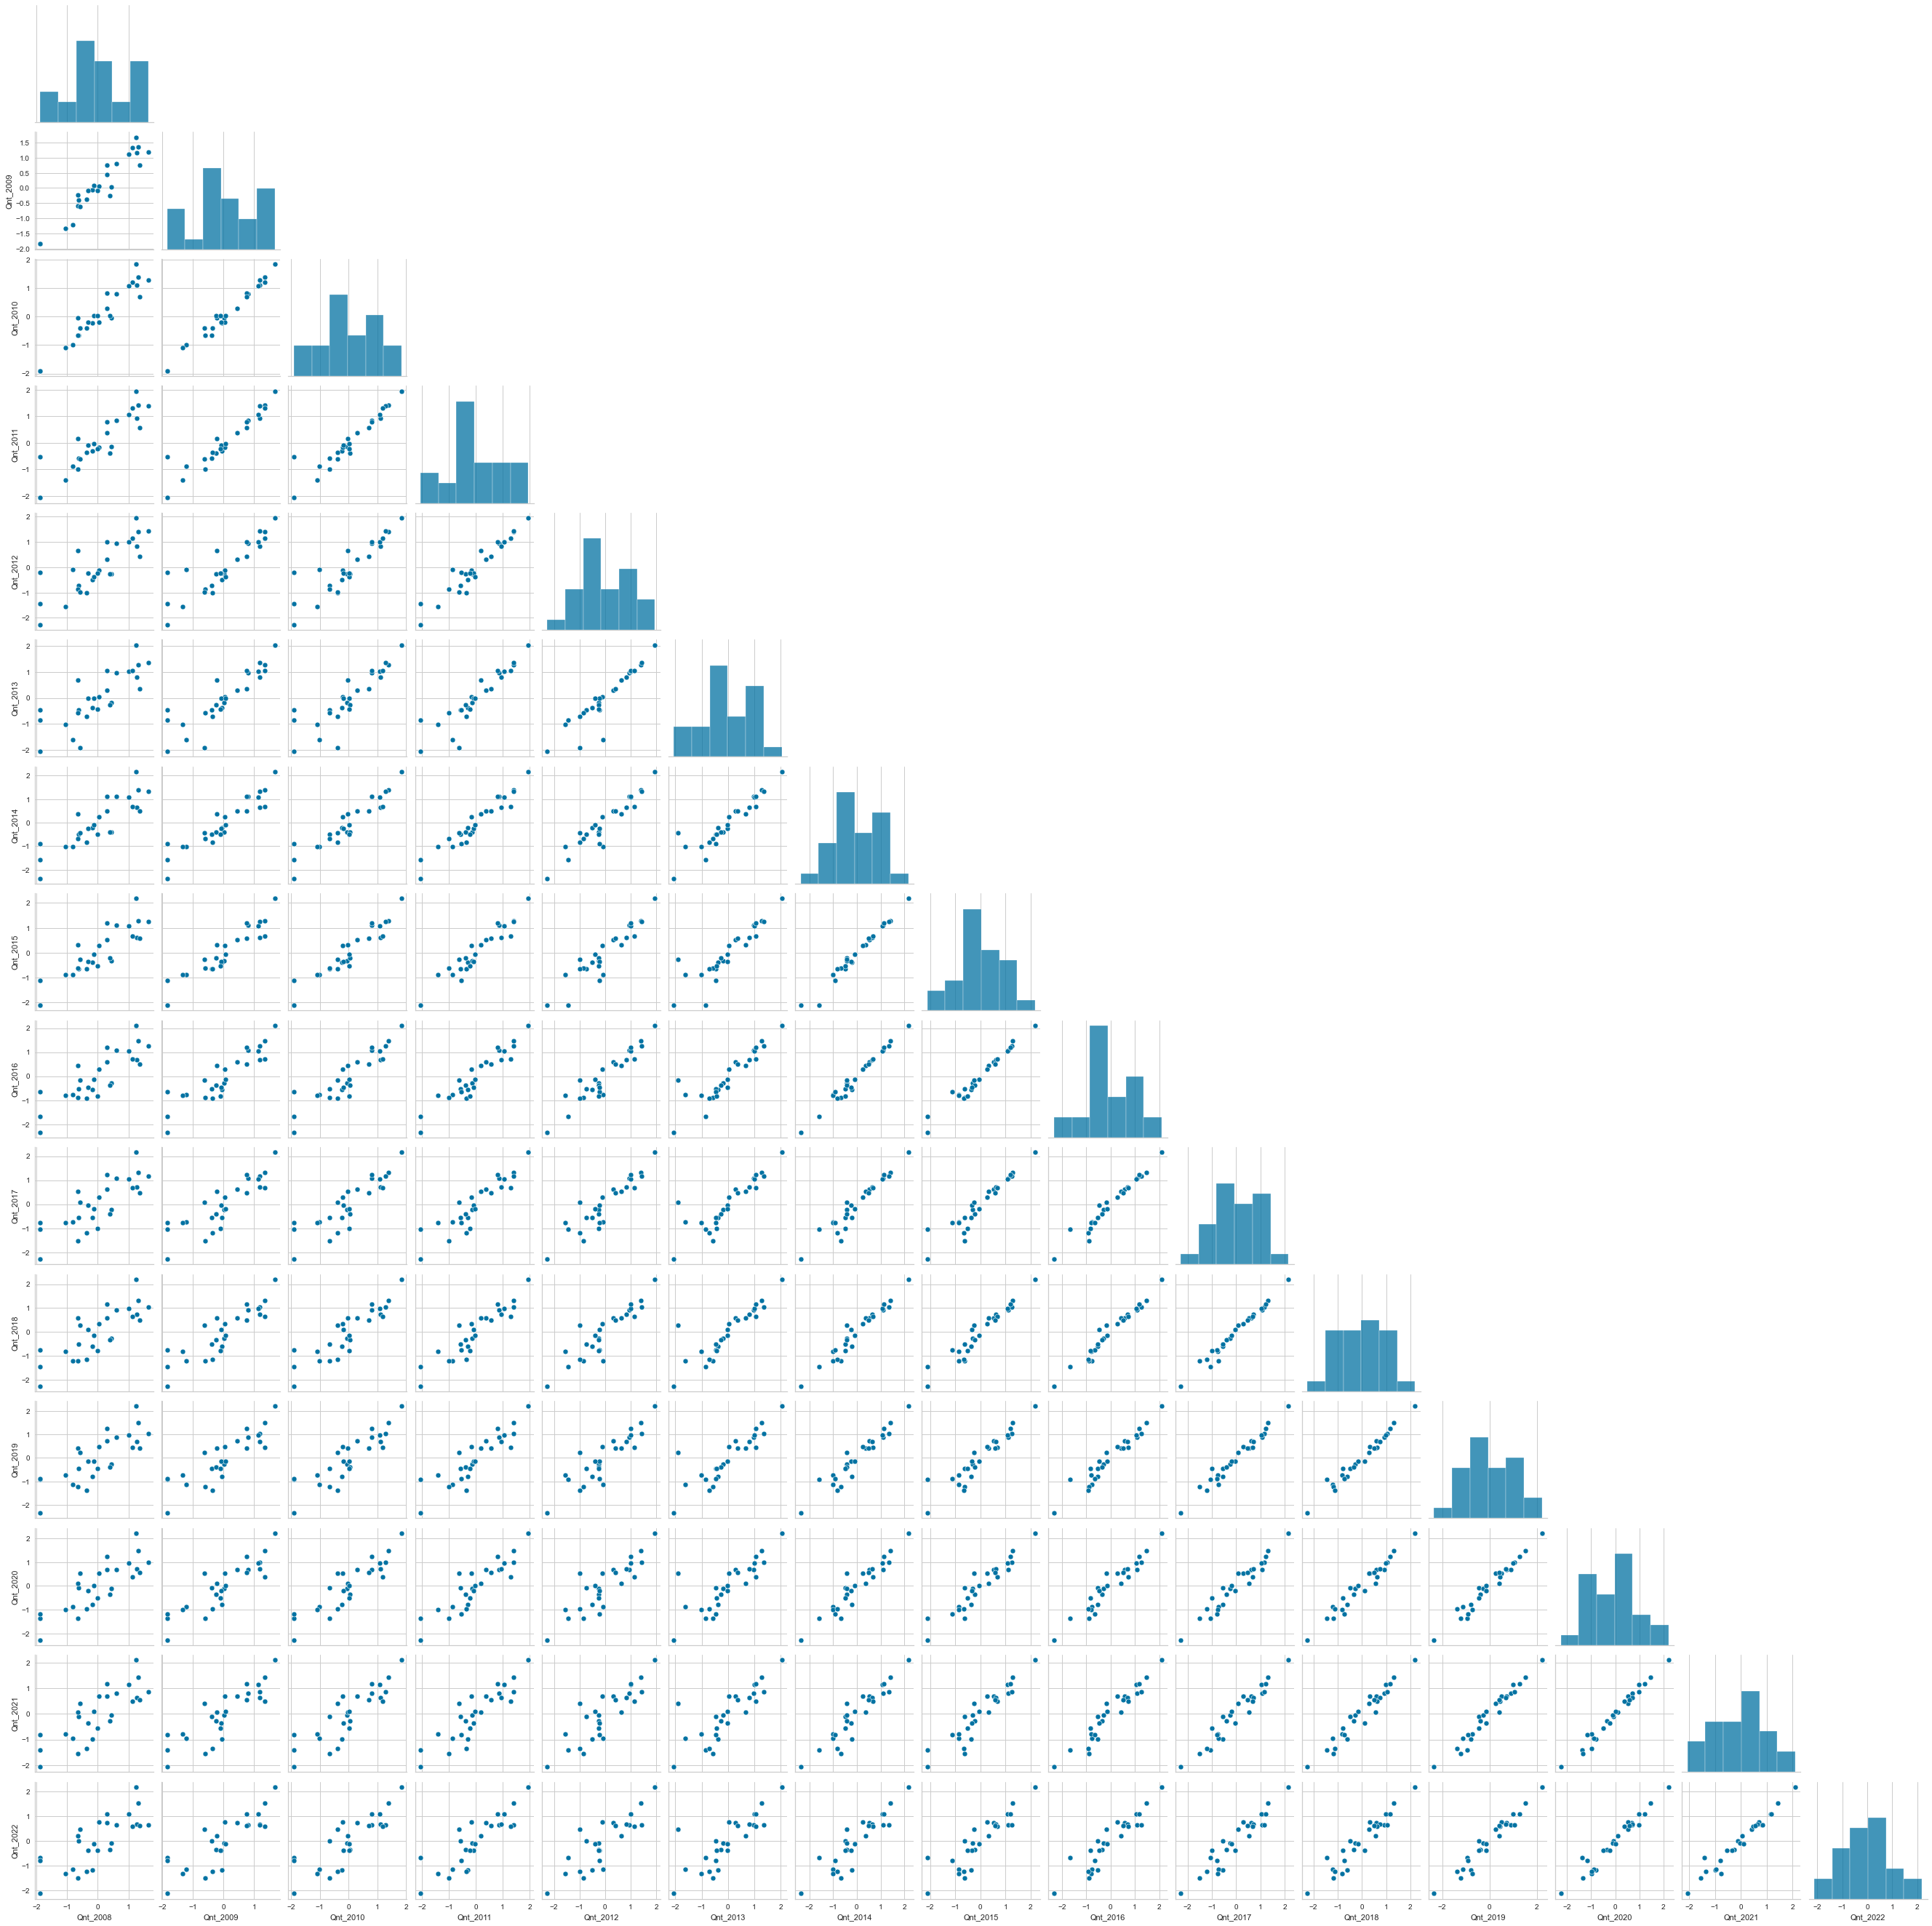

In [9]:
#https://machinelearningmastery.com/power-transforms-with-scikit-learn/
from sklearn.preprocessing import QuantileTransformer, PowerTransformer

# power transform the raw data
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(df)

df_transf=pd.DataFrame(data_trans, index=df.index ,columns = df.columns)

sns.pairplot(df_transf,corner=True)



# Normalização

In [10]:
normalized_df = (df_transf-df_transf.mean())/df_transf.std()
normalized_df.describe().T

# Pre-processing

,count,mean,std,min,25%,50%,75%,max
Qnt_2008,27.0,8.223874e-17,1.0,-1.843642,-0.620205,-0.022288,0.793828,1.615163
Qnt_2009,27.0,3.289550e-17,1.0,-1.804926,-0.482687,-0.063243,0.765896,1.643713
Qnt_2010,27.0,-1.644775e-17,1.0,-1.866391,-0.511213,-0.039440,0.790429,1.808438
Qnt_2011,27.0,-8.223874e-17,1.0,-2.021837,-0.547903,-0.150259,0.809445,1.911822
Qnt_2012,27.0,-2.878356e-17,1.0,-2.223394,-0.599357,-0.207114,0.872271,1.915321
Qnt_2013,27.0,-5.551115e-17,1.0,-2.015435,-0.507409,-0.016529,0.873813,2.001748
Qnt_2014,27.0,-2.672759e-17,1.0,-2.321455,-0.579261,-0.200916,0.651263,2.125954
Qnt_2015,27.0,-7.812681e-17,1.0,-2.069961,-0.617698,-0.209113,0.637353,2.132428
Qnt_2016,27.0,7.401487e-17,1.0,-2.287586,-0.692799,-0.173423,0.684320,2.067406
Qnt_2017,27.0,1.850372e-17,1.0,-2.242930,-0.733833,-0.053474,0.675699,2.112831


<AxesSubplot:>

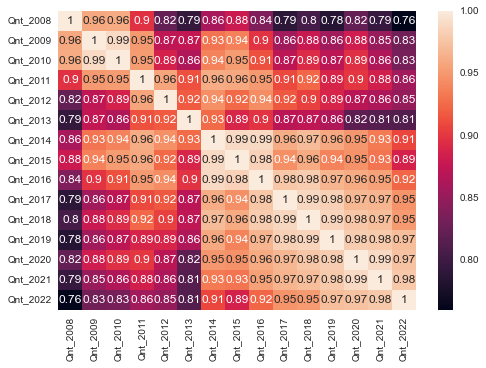

In [11]:
corr_matrix = normalized_df.corr()
sns.heatmap(corr_matrix, annot=True)

# Kmeans

C:\Users\shtsu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shtsu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shtsu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shtsu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

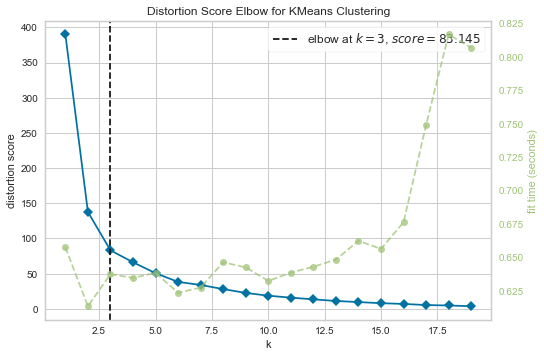

In [12]:
from sklearn.cluster import KMeans

MYSEED=50

#“elbow” the point after which the distortion start decreasing in a linear fashion
# metric distortion, computes the sum of squared distances from each point to its assigned center.
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 20),metric='distortion')
visualizer.fit(normalized_df); 
visualizer.poof();

C:\Users\shtsu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shtsu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shtsu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shtsu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

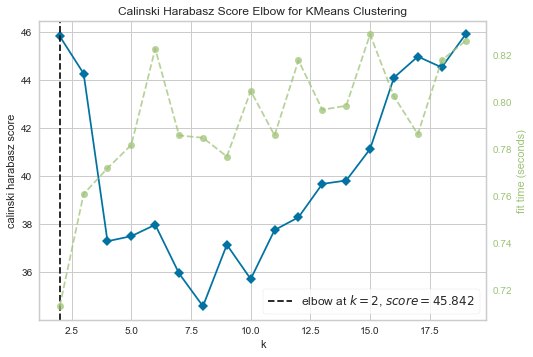

In [13]:
#https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad

''' metric calinski_harabasz, computes the ratio of dispersion between and within clusters
The Calinski-Harabasz Index is based on the idea that clusters that are (1) themselves very compact and 
(2) well-spaced from each other are good clusters. 
The index is calculated by dividing the variance of the sums of squares of the distances of individual 
objects to their cluster center by the sum of squares of the distance between the cluster centers. 
Higher the Calinski-Harabasz Index value, better the clustering model
'''

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2, 20),metric='calinski_harabasz')
visualizer.fit(normalized_df); 
visualizer.poof();

C:\Users\shtsu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shtsu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shtsu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shtsu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

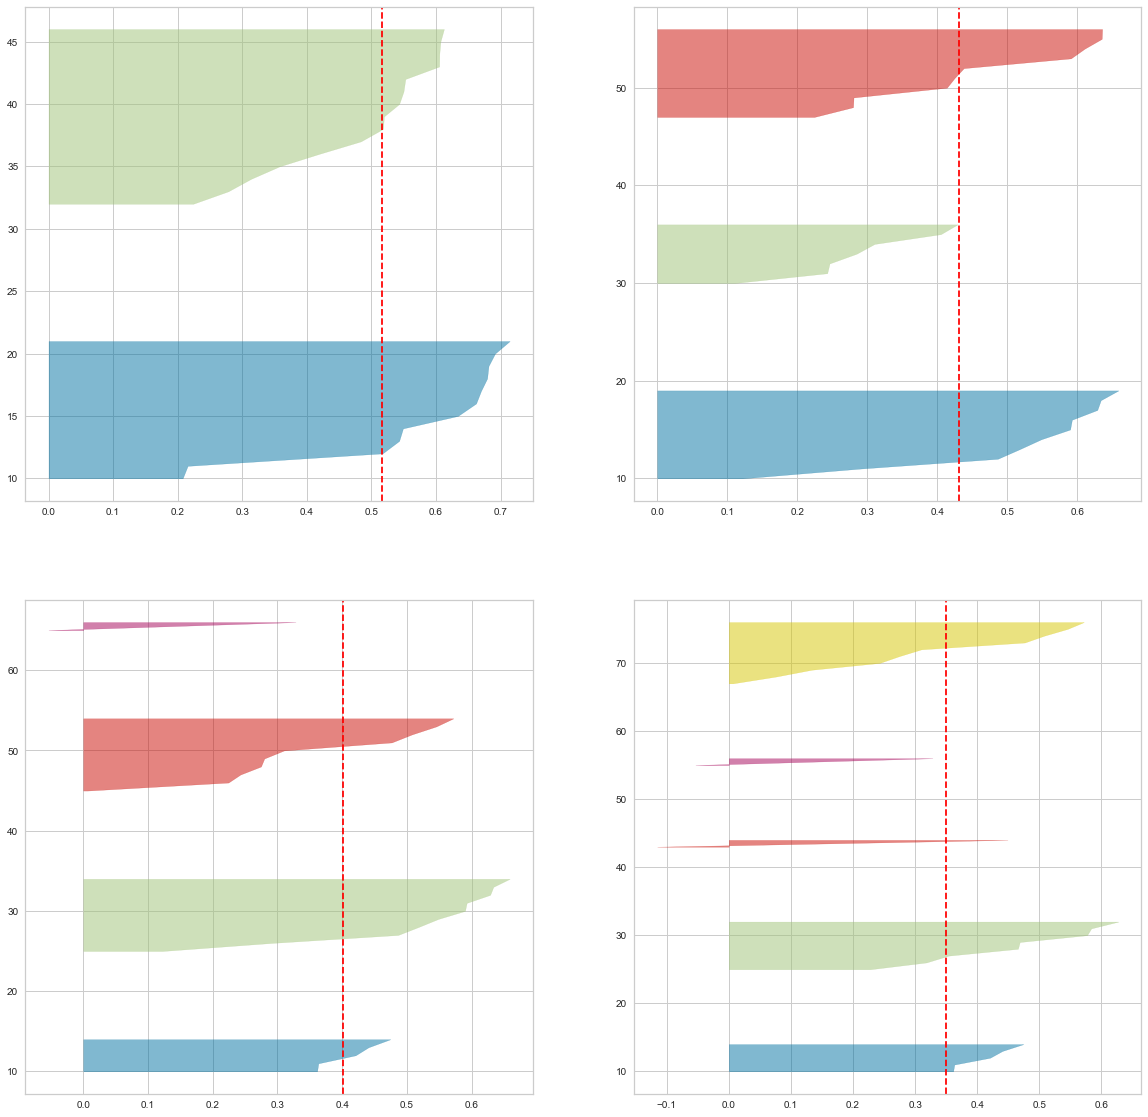

In [14]:
from yellowbrick.cluster import SilhouetteVisualizer

#The silhouette score for each cluster is above average silhouette scores. 
#The fluctuation in size is similar.
#The thickness uniform

fig, ax = plt.subplots(2, 2, figsize=(20,20))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=MYSEED)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(normalized_df)


In [15]:
from sklearn.decomposition import PCA 
def plot_cluster_points(df, labels, ax=None, hue="cluster", legend="auto"):
    pca = PCA(2) 
    pca_data = pd.DataFrame(pca.fit_transform(df), columns=['PC1','PC2']) 
    pca_data['cluster'] = pd.Categorical(labels)
    sns.scatterplot(x="PC1", y="PC2", hue=hue, data=pca_data, ax=ax, legend=legend)

C:\Users\shtsu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shtsu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


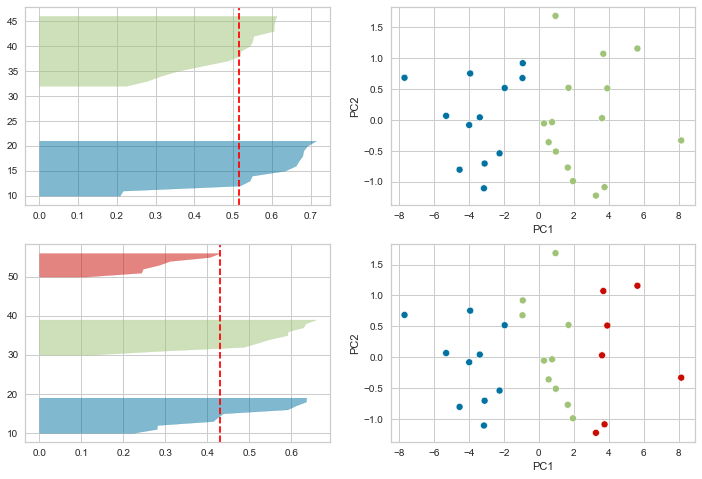

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

km_2 = KMeans(n_clusters=2)
visualizer = SilhouetteVisualizer(km_2, ax=axs[0, 0], colors='yellowbrick')
visualizer.fit(normalized_df)

plot_cluster_points(normalized_df, km_2.labels_, 
        hue=list(map(lambda x: sns.color_palette().as_hex()[x], km_2.labels_)), legend=False, ax=axs[0, 1])

km_3 = KMeans(n_clusters=3)
visualizer = SilhouetteVisualizer(km_3, ax=axs[1, 0], colors='yellowbrick')
visualizer.fit(normalized_df)

plot_cluster_points(normalized_df, km_3.labels_, 
        hue=list(map(lambda x: sns.color_palette().as_hex()[x], km_3.labels_)), legend=False, ax=axs[1, 1])

In [17]:
# 2 cluster 
kmeans = KMeans(n_clusters=2, random_state=MYSEED).fit(normalized_df)
cluster_df = normalized_df.copy()
cluster_df['cluster_kmeans'] = kmeans.labels_
cluster_df.head()

C:\Users\shtsu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Qnt_2008,Qnt_2009,Qnt_2010,Qnt_2011,Qnt_2012,Qnt_2013,Qnt_2014,Qnt_2015,Qnt_2016,Qnt_2017,Qnt_2018,Qnt_2019,Qnt_2020,Qnt_2021,Qnt_2022,cluster_kmeans
Unidade da Federação,,,,,,,,,,,,,,,,
11 Rondônia,0.280691,0.433421,0.289397,0.366433,0.321528,0.281108,0.501659,0.512602,0.570696,0.601128,0.577633,0.701960,0.671129,0.678017,0.714021,0
12 Acre,-0.170334,-0.063243,-0.228301,-0.307730,-0.488797,-0.378957,-0.200916,-0.367439,-0.533841,-0.551844,-0.599458,-0.787277,-0.782674,-0.975594,-1.140639,1
13 Amazonas,-0.815265,-1.187203,-0.984037,-0.867622,-0.083283,-1.582674,-1.000554,-0.852333,-0.752995,-0.717274,-1.181468,-1.107983,-0.868530,-0.945850,-1.114057,1
14 Roraima,-1.843642,-1.804926,-1.866391,-2.021837,-1.422923,-0.844111,-1.558463,-2.069961,-1.648386,-1.036911,-1.424394,-0.913638,-1.349916,-1.397308,-0.654298,1
15 Pará,-0.609407,-0.382324,-0.637717,-0.572279,-0.709918,-0.460663,-0.479681,-0.622369,-0.521951,-0.539781,-0.484487,-0.435043,-0.065995,-0.100035,0.008192,1


C:\Users\shtsu\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


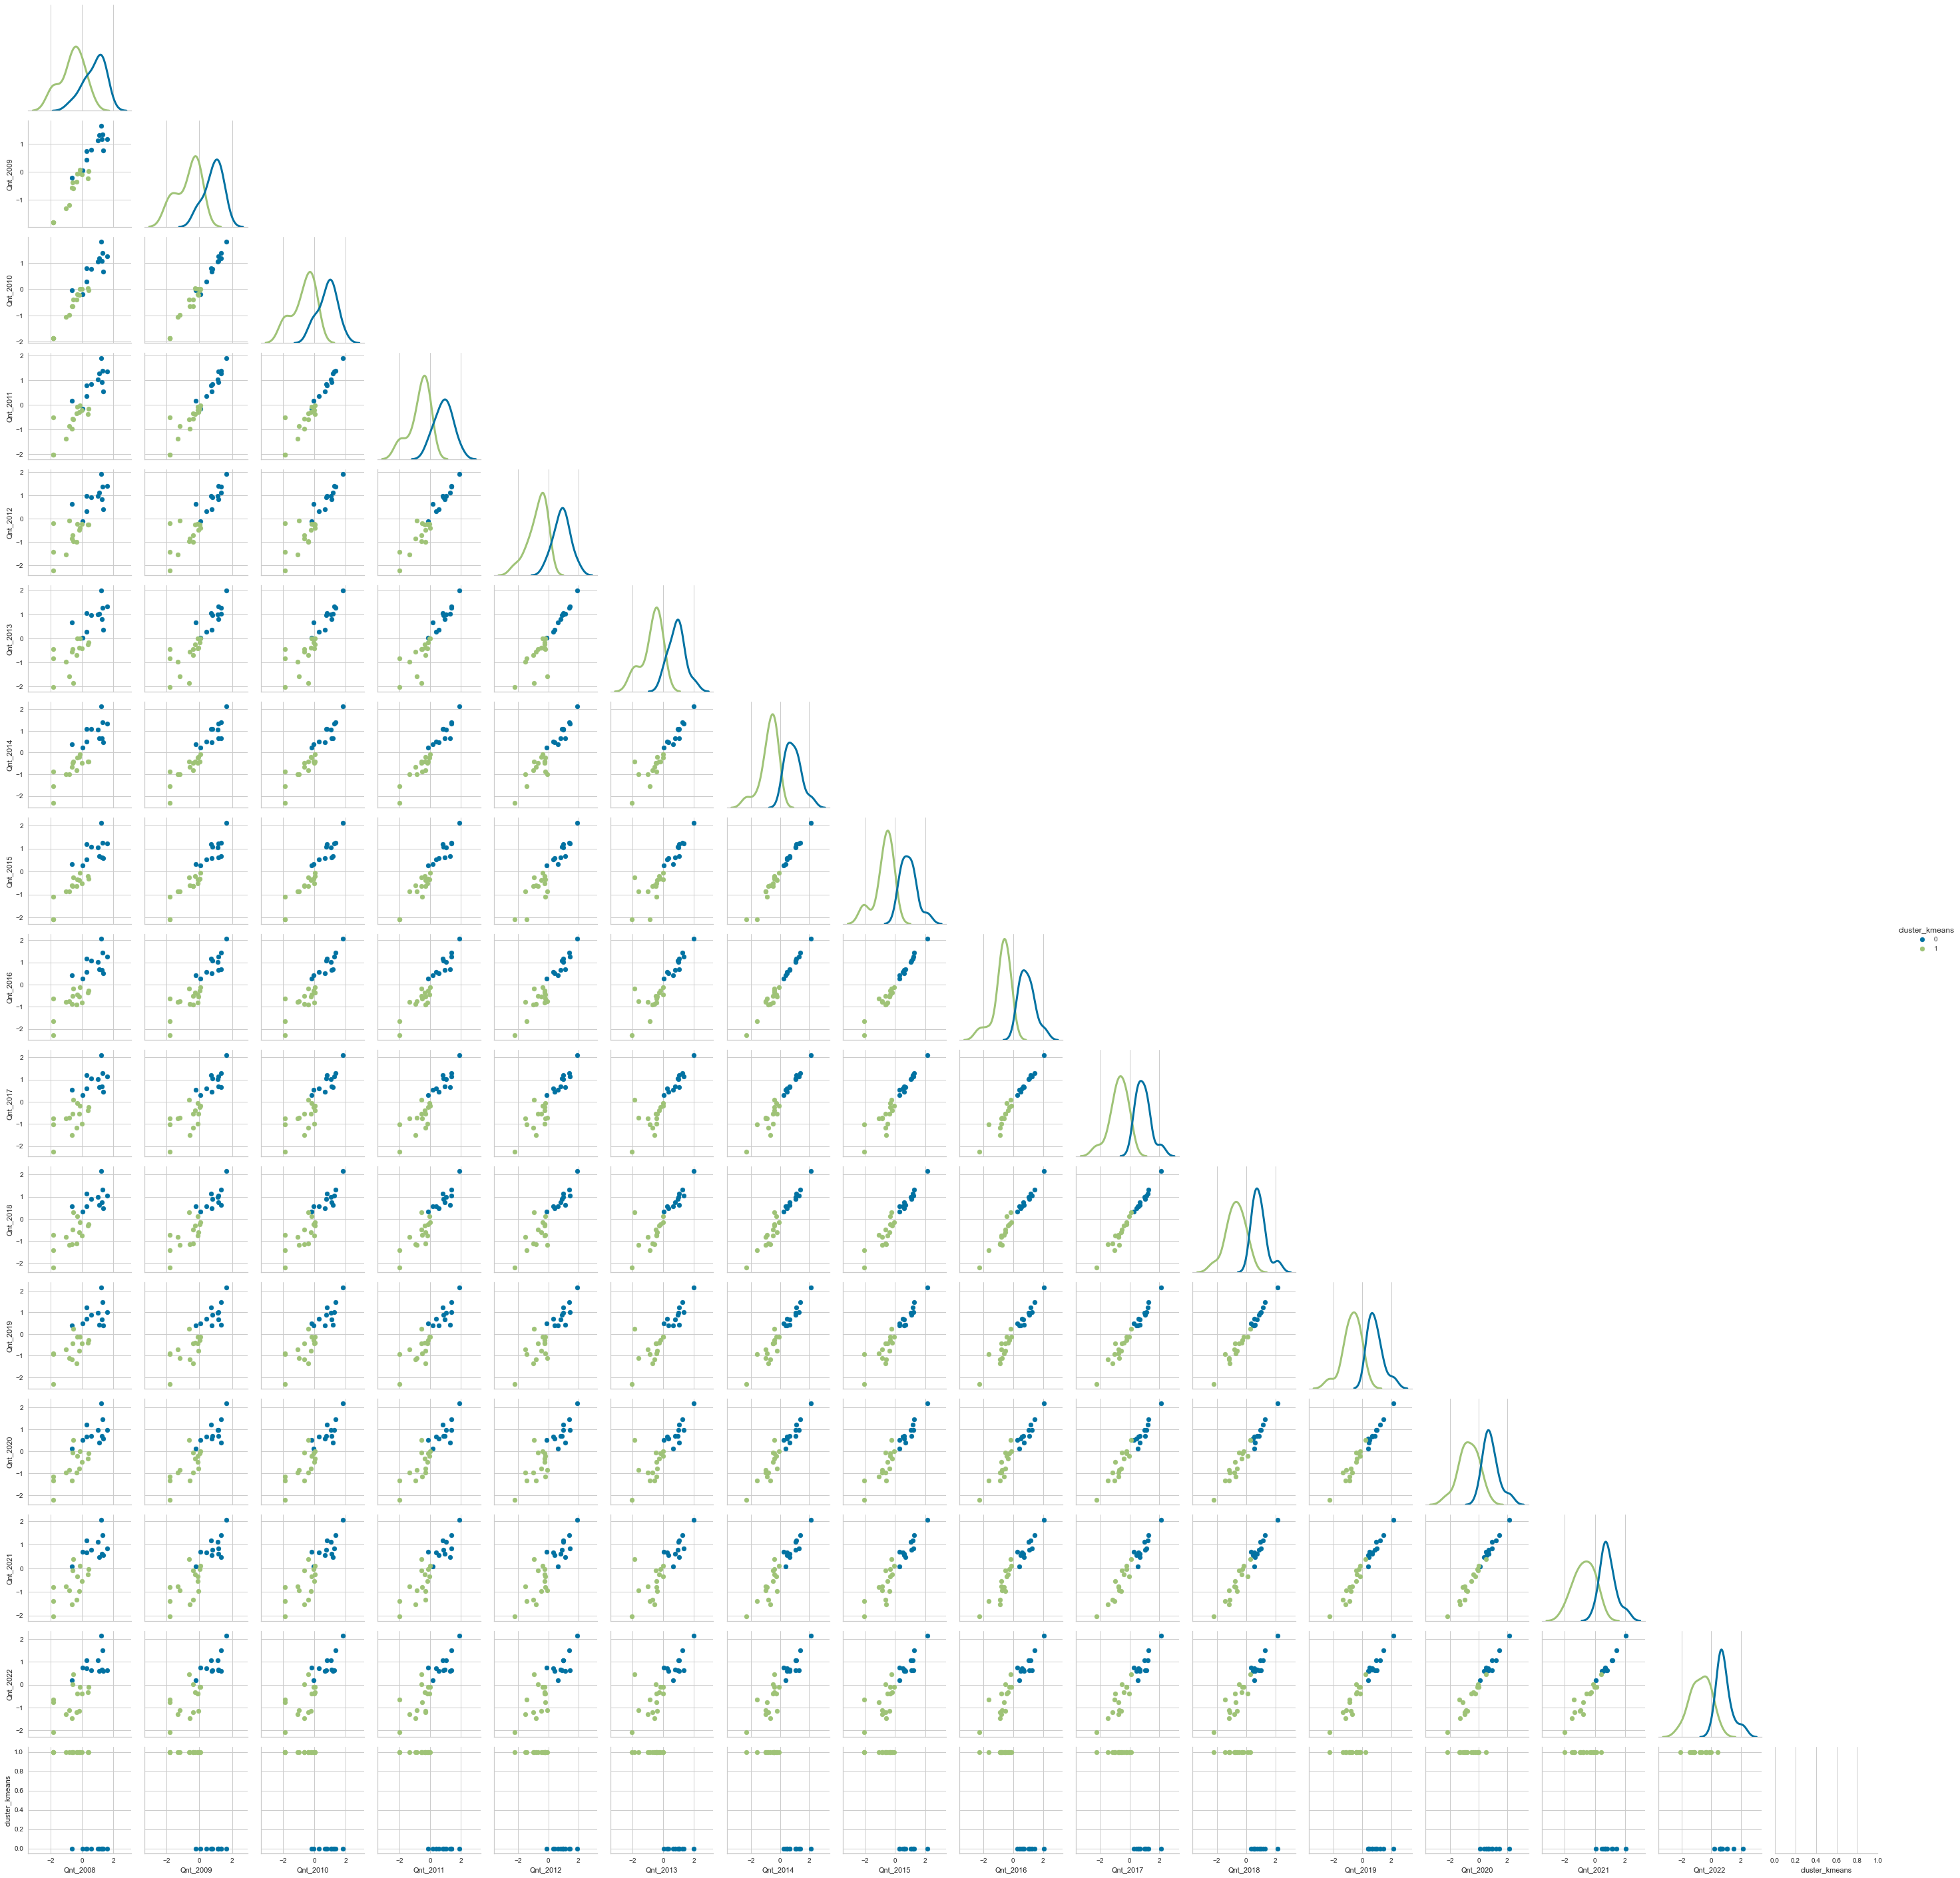

In [18]:
g = sns.PairGrid(cluster_df, vars=cluster_df, hue='cluster_kmeans',corner=True)
g.map_diag(sns.kdeplot, lw=3)
g.map_offdiag(plt.scatter)
#g.map(plt.scatter) todas as celulas serao scatter.
g.add_legend()

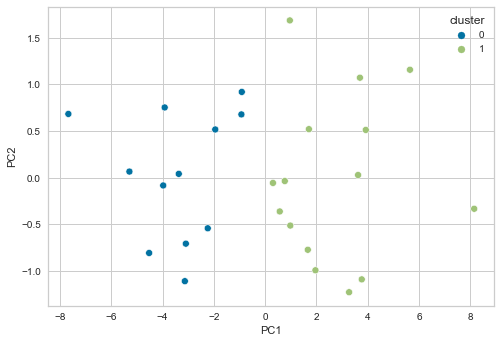

In [19]:
plot_cluster_points(normalized_df, kmeans.labels_)

In [20]:
#clusters means

result_kmeans=cluster_df.groupby('cluster_kmeans').agg(['mean','std']).T

#save as image
import dataframe_image as dfi
dfi.export(result_kmeans, 'dataframe.png')

result_kmeans.head()

cluster_kmeans         0         1
Qnt_2008 mean   0.782528 -0.626023
         std    0.672860  0.746089
Qnt_2009 mean   0.852295 -0.681836
         std    0.549042  0.706788
Qnt_2010 mean   0.839613 -0.671690

# DBSCAN

[0.62014948 0.62014948 0.73238737 0.73238737 0.78904143 0.86854702
 0.87835669 0.87835669 0.97115929 1.01079499 1.01079499 1.05164416
 1.09319423 1.12428361 1.1881136  1.1881136  1.23460115 1.34048626
 1.44775967 1.62378472 1.78046043 1.78046043 2.05455497 2.15700384
 2.44040749 2.53217362 3.19301532]


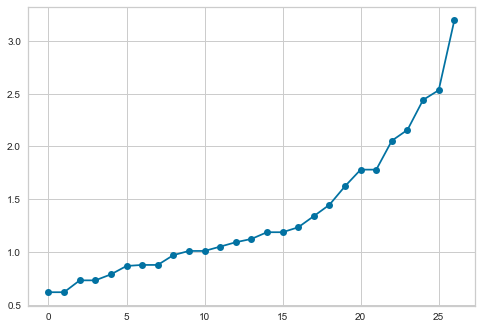

In [21]:
# Escolher epsilon
#https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
#we find a suitable value for epsilon by calculating the distance to the nearest n points for each point
#sorting and plotting the results. Then we look to see where the change is most pronounced


import numpy as np

from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(normalized_df)
distances, indices = nbrs.kneighbors(normalized_df)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
print(distances)
plt.plot(distances, marker='o')

Estimated no. of clusters: 2
Estimated no. of noise points: 12


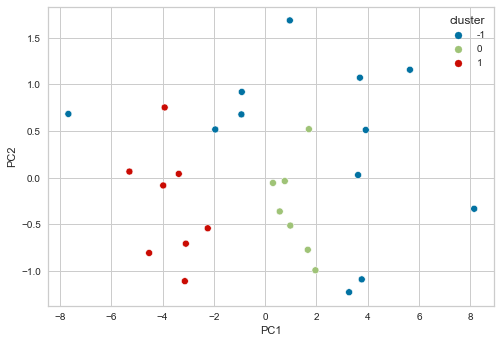

In [46]:
from sklearn.cluster import DBSCAN
epsilon = 1.44775967 
min_samples = 4

db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(normalized_df)
labels=db.labels_
no_clusters = len(np.unique(labels) )
if -1 in db.labels_: # noise is -1
    no_clusters=no_clusters-1 

no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)
plot_cluster_points(normalized_df, db.labels_)

In [47]:
cluster_df['cluster_dbscan'] = db.labels_
data_last_n = cluster_df.iloc[:, 15:]              # Select last columns
print(data_last_n)                          # Print last columns
#save as image
import dataframe_image as dfi
dfi.export(data_last_n, 'dataframe.png')

                        cluster_kmeans  cluster_dbscan
Unidade da Federação                                  
11 Rondônia                          0              -1
12 Acre                              1               0
13 Amazonas                          1              -1
14 Roraima                           1              -1
15 Pará                              1               0
16 Amapá                             1              -1
17 Tocantins                         1              -1
21 Maranhão                          1               0
22 Piauí                             0              -1
23 Ceará                             1               0
24 Rio Grande do Norte               1              -1
25 Paraíba                           1              -1
26 Pernambuco                        0               1
27 Alagoas                           0              -1
28 Sergipe                           1              -1
29 Bahia                             0               1
31 Minas G

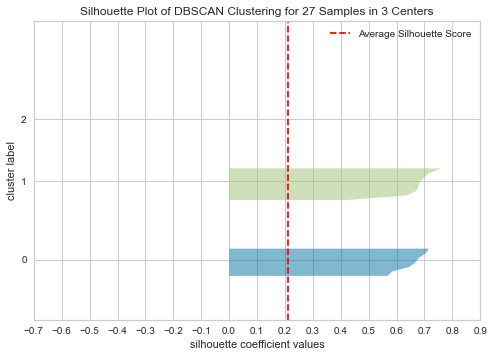

In [48]:
# Yellowbrick is designed to work with K-Means and not with DBSCAN.
# So it needs the number of clusters stored in n_clusters
# It also needs `predict` method to be implemented.
# So I'm implementing it here so that we can use Yellowbrick to show Silhouette plots.
n_clusters = len(set(db.labels_))
db.n_clusters = n_clusters
db.predict = lambda x: db.labels_

visualizer = SilhouetteVisualizer(db, colors="yellowbrick")
visualizer.fit(normalized_df)  # Fit the data to the visualizer
visualizer.show();

In [45]:
normalized_df

,Qnt_2008,Qnt_2009,Qnt_2010,Qnt_2011,Qnt_2012,Qnt_2013,Qnt_2014,Qnt_2015,Qnt_2016,Qnt_2017,Qnt_2018,Qnt_2019,Qnt_2020,Qnt_2021,Qnt_2022
Unidade da Federação,,,,,,,,,,,,,,,
11 Rondônia,0.280691,0.433421,0.289397,0.366433,0.321528,0.281108,0.501659,0.512602,0.570696,0.601128,0.577633,0.701960,0.671129,0.678017,0.714021
12 Acre,-0.170334,-0.063243,-0.228301,-0.307730,-0.488797,-0.378957,-0.200916,-0.367439,-0.533841,-0.551844,-0.599458,-0.787277,-0.782674,-0.975594,-1.140639
13 Amazonas,-0.815265,-1.187203,-0.984037,-0.867622,-0.083283,-1.582674,-1.000554,-0.852333,-0.752995,-0.717274,-1.181468,-1.107983,-0.868530,-0.945850,-1.114057
14 Roraima,-1.843642,-1.804926,-1.866391,-2.021837,-1.422923,-0.844111,-1.558463,-2.069961,-1.648386,-1.036911,-1.424394,-0.913638,-1.349916,-1.397308,-0.654298
15 Pará,-0.609407,-0.382324,-0.637717,-0.572279,-0.709918,-0.460663,-0.479681,-0.622369,-0.521951,-0.539781,-0.484487,-0.435043,-0.065995,-0.100035,0.008192
16 Amapá,-1.048232,-1.310053,-1.062668,-1.381878,-1.529040,-0.984550,-0.997928,-0.855319,-0.791804,-0.750392,-0.808560,-0.703013,-0.966137,-0.761640,-1.295512
17 Tocantins,-0.631003,-0.583050,-0.646769,-0.977639,-0.837799,-0.554155,-0.672128,-0.613026,-0.872363,-1.490691,-1.167522,-1.189884,-1.327561,-1.530053,-1.461524
21 Maranhão,0.434219,0.023280,-0.042818,-0.150259,-0.248810,-0.179083,-0.404732,-0.316724,-0.280309,-0.232361,-0.260456,-0.266977,-0.096824,-0.029848,-0.088603
22 Piauí,-0.645930,-0.219693,-0.039440,0.168491,0.632728,0.660960,0.371689,0.310623,0.424572,0.526012,0.565099,0.398036,0.100620,0.066904,0.196018


In [49]:
import dill
#dill.dump_session('notebook_session.db')

In [1]:
import dill
#dill.load_session('notebook_session.db')